In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('./source/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
x = df.iloc[:,[2,4,5,9]]
y = df.iloc[:,1]

In [4]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
x['Sex'] = le_sex.fit_transform(x['Sex'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
x.Age = x.Age.fillna(x.Age.mean())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [6]:
x.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [7]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [8]:
from sklearn import tree

In [9]:
mod = tree.DecisionTreeClassifier()
mod.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
mod.score(x,y)

0.9797979797979798

In [11]:
mod.predict([[3,0,22.0,7.2500]])

array([1], dtype=int64)

In [12]:
y_pr = mod.predict(x)
from sklearn.metrics import confusion_matrix
cmm = confusion_matrix(y,y_pr)
cmm

array([[546,   3],
       [ 15, 327]], dtype=int64)

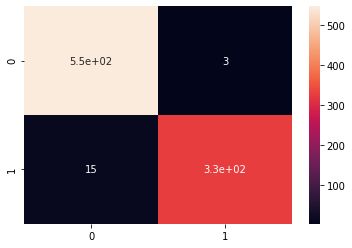

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cmm, annot=True)

## Second Way

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size = .2)

In [16]:
len(x_train)

712

In [17]:
len(x_test)

179

In [18]:
from sklearn import tree
modd = tree.DecisionTreeClassifier()
modd.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
modd.score(x_test,y_test)

0.7541899441340782

In [20]:
modd.predict([[3,0,22.0,7.2500]])

array([1], dtype=int64)

In [21]:
y_pr = mod.predict(x_test)
from sklearn.metrics import confusion_matrix
cmmm = confusion_matrix(y_test,y_pr)
cmmm

array([[116,   0],
       [  4,  59]], dtype=int64)

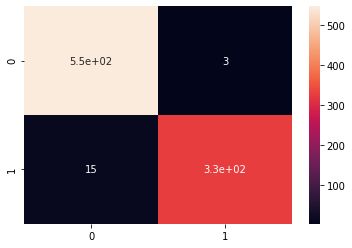

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cmm, annot=True)